# ДЗ №5 Сегментация
Реализация сети для сегметации объектов.

__Задача__ сделать работоспособную сеть для сегментирования изображений авто на основе предложенного шаблона


![Segmentation](../img/Segment04.png)

### Что делаем
Реализуем сверточную сеть для семантической сегментации, downsample->upsample -> Классификация каждого пикселя выходного изображения: 0 - не авто, 1 - авто. Выход картинка с x каналами, для классификации.
1. В файле model.py   - имплементировать модель вместо заглушки
2. В файле train.py - поставить правильный loss

### Данные
[Carvana](https://cloud.mail.ru/public/3tdq/AvtaHkDAb)

### Зависимости
 - tensorflow  - поддержка tensorboard
 - tensorboardx - тензор боард для pytorch
 - tqdm         - пакет для отрисовки прогресс баров

### Запуск пакета
_ По умолчанию все данные лежат в папке ./data/. Если вы положили их в другую папку, то поправте в скрипте train.py пути _
<br/>
Запускаем обучение сети
python train.py

Результаты обучение можно наблюдать в tensorboard

Запуск tensorboard --log ./od_log

## Результаты
1. Код model.py, train.py
2. Модель state_dicts()

### Тут нужно сделать загрузку состояния вашей модели, код модели в ноутбук тащить не нужно, достаточно сделать import model


In [44]:
!python3 train.py

Current epoch:  0
100%|█████████████████████████████████████████| 916/916 [01:20<00:00, 11.34it/s]
Epoch loss tensor(0.0755, device='cuda:0')
Make test
100%|█████████████████████████████████████████| 102/102 [00:09<00:00, 13.76it/s]
Test loss tensor(0.0739, device='cuda:0')
Current epoch:  1
100%|█████████████████████████████████████████| 916/916 [01:21<00:00, 11.22it/s]
Epoch loss tensor(0.0720, device='cuda:0')
Make test
100%|█████████████████████████████████████████| 102/102 [00:09<00:00, 13.52it/s]
Test loss tensor(0.0713, device='cuda:0')
Current epoch:  2
100%|█████████████████████████████████████████| 916/916 [01:21<00:00, 11.20it/s]
Epoch loss tensor(0.0705, device='cuda:0')
Make test
100%|█████████████████████████████████████████| 102/102 [00:09<00:00, 10.37it/s]
Test loss tensor(0.0707, device='cuda:0')
Current epoch:  3
100%|█████████████████████████████████████████| 916/916 [01:20<00:00, 12.75it/s]
Epoch loss tensor(0.0693, device='cuda:0')
Make test
100%|██████████████████

In [21]:
import torch
from model import SegmenterModel

model = SegmenterModel()
model.load_state_dict(torch.load('./net_saved.pth'))
model.eval()

SegmenterModel(
  (encoder_conv_10): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (encoder_bn_10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (encoder_conv_20): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (encoder_bn_20): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (encoder_conv_21): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (encoder_bn_21): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (encoder_conv_30): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (encoder_bn_30): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (encoder_conv_31): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (encoder_bn_31): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (decoder_convtr_10): ConvTranspose2d(128, 

In [30]:
import torch.nn as nn
import warnings
from tqdm import *
from torch.autograd import Variable
warnings.filterwarnings('ignore')

In [23]:
criterion = nn.CrossEntropyLoss()

In [24]:
import torch.utils.data as dt
from carvana_dataset import CarvanaDataset

In [25]:
test = './data/test/'
test_masks = './data/test_masks'
ds_test = CarvanaDataset(test, test_masks)

dl_test = dt.DataLoader(ds_test, shuffle=False, num_workers=4, batch_size=5)

In [26]:
useCuda = False

In [31]:
if useCuda == True:
    model = model.cuda()
    criterion= criterion.cuda()
print ("Make test")
test_loss = 0
model.train(False)
for iter, (i, t) in enumerate(tqdm(dl_test)):
    i = Variable(i, volatile = True)
    t = Variable(t, volatile = True)
    if useCuda:
        i = i.cuda()
        t = t.cuda()
    o = model(i)
    loss = criterion(o, t.squeeze(1).long())
    test_loss += loss.data
test_loss = test_loss / float(len(ds_test))
print ("Test loss", test_loss)

  0%|          | 0/102 [00:00<?, ?it/s]

Make test


100%|██████████| 102/102 [02:19<00:00,  1.20s/it]

Test loss tensor(0.0652)


### Тут нужно нарисовать картинки, с результатими сегментации из тестового сета

In [39]:
import scipy.misc
from matplotlib import pyplot as plt
%matplotlib inline

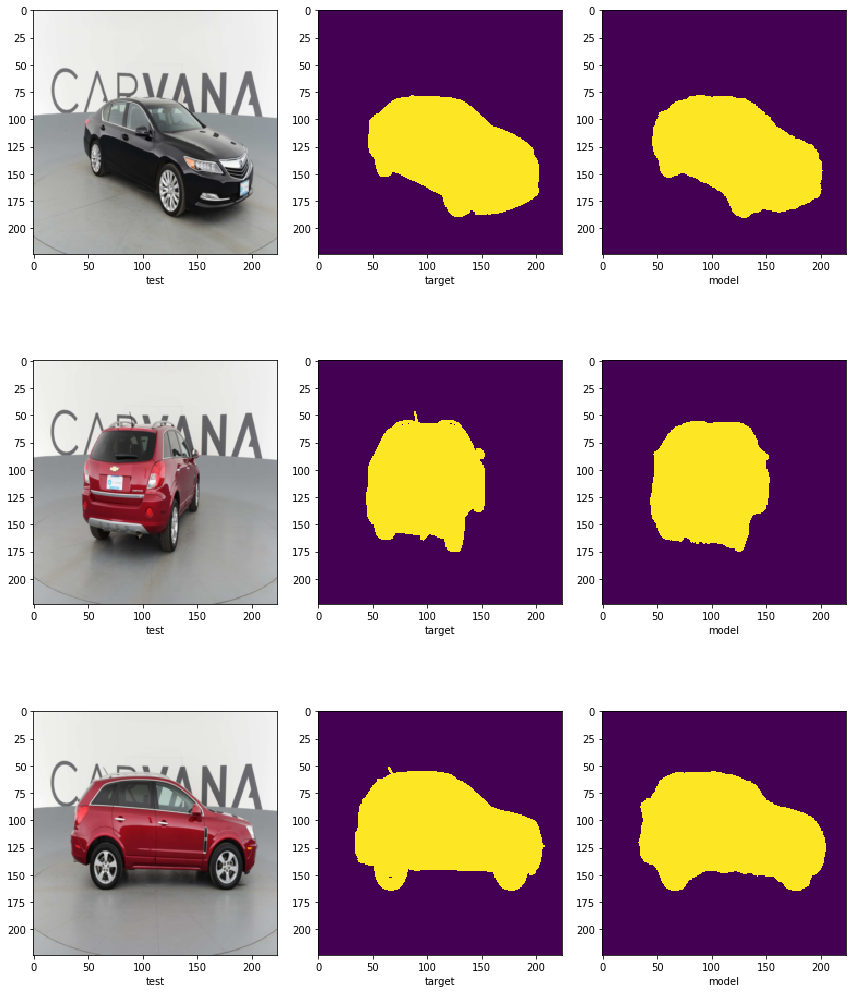

In [62]:
for iter, (i, t) in enumerate(dl_test):
    i = Variable(i, volatile = True)
    t = Variable(t, volatile = True)
    if useCuda :
        i = i.cuda()
        t = t.cuda()
    o = model(i)
    
    fig = plt.figure(figsize=(12, 15))
    
    ax0 = fig.add_subplot(331)
    ax1 = fig.add_subplot(332)
    ax2 = fig.add_subplot(333)
    
    ax3 = fig.add_subplot(334)
    ax4 = fig.add_subplot(335)
    ax5 = fig.add_subplot(336)
    
    ax6 = fig.add_subplot(337)
    ax7 = fig.add_subplot(338)
    ax8 = fig.add_subplot(339)
    
    ax0.imshow(i[0].cpu().permute(1,2,0))
    ax0.set_xlabel('test')
    ax1.imshow(t[0].cpu().squeeze(0))
    ax1.set_xlabel('target')
    ax2.imshow(o[0].cpu().squeeze(0).detach().numpy()[1,:,:])
    ax2.set_xlabel('model')
    
    ax3.imshow(i[1].cpu().permute(1,2,0))
    ax3.set_xlabel('test')
    ax4.imshow(t[1].cpu().squeeze(0))
    ax4.set_xlabel('target')
    ax5.imshow(o[1].cpu().squeeze(0).detach().numpy()[1,:,:])
    ax5.set_xlabel('model')
    
    ax6.imshow(i[2].cpu().permute(1,2,0))
    ax6.set_xlabel('test')
    ax7.imshow(t[2].cpu().squeeze(0))
    ax7.set_xlabel('target')
    ax8.imshow(o[2].cpu().squeeze(0).detach().numpy()[1,:,:])
    ax8.set_xlabel('model')
    
    plt.tight_layout()
    plt.show()
    break